# Importar librerías

In [ ]:
#pip install --upgrade matplotlib

In [1]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from google.colab import drive
drive.mount('/content/drive')


from sklearn.ensemble import RandomForestClassifier


Mounted at /content/drive


# Cargar datos

In [3]:
path_datos='/content/drive/Shareddrives/Data_TFM/Dataset_Final/df_final_v7.csv'

df= pd.read_csv(path_datos, sep=",",  low_memory=False)

X_test = df[(df["date_day"] > "2022-12-31") & (df["date_day"] < "2023-06-01")].drop(["churn"], axis=1)

X_test.set_index(['unique_venue_id', 'date_day'], inplace=True)

# Cargar modelo

In [4]:
# Cargar el modelo desde el archivo
path_modelo='/content/drive/Shareddrives/Data_TFM/Notebooks/rf_f1_v2.pkl'
with open(path_modelo, 'rb') as file:
    rf_model = pickle.load(file)



#Creo el objeto 'Explainer' para evaluar los datos de testeo.

In [ ]:
# Fits the explainer
explainer = shap.Explainer(rf_model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 749883it [3:21:52, 61.86it/s]                            


###Guardar Shap Values

In [ ]:
path_shap='/content/drive/Shareddrives/Data_TFM/Dataset_Final/shap_values_rf_f1_v2.pkl'

# Guardar los SHAP values en un archivo
with open(path_shap, 'wb') as file:
    pickle.dump(shap_values, file)


### Abrir Shap Values

In [5]:
# abrir shap
import pickle

path_shap='/content/drive/Shareddrives/Data_TFM/Dataset_Final/shap_values_rf_f1_v2.pkl'

# Cargar los SHAP values desde el archivo
with open(path_shap, 'rb') as file:
    shap_values = pickle.load(file)


#Grafico de los valores medios de shap
Por variable se obtiene el valor shap en valor absoluto de cada observacion, para luego obtener la media de dichos valores.
De este valor se ordenar de mayor a menor para mostrar que variables tienen mas efecto en la prediccion.

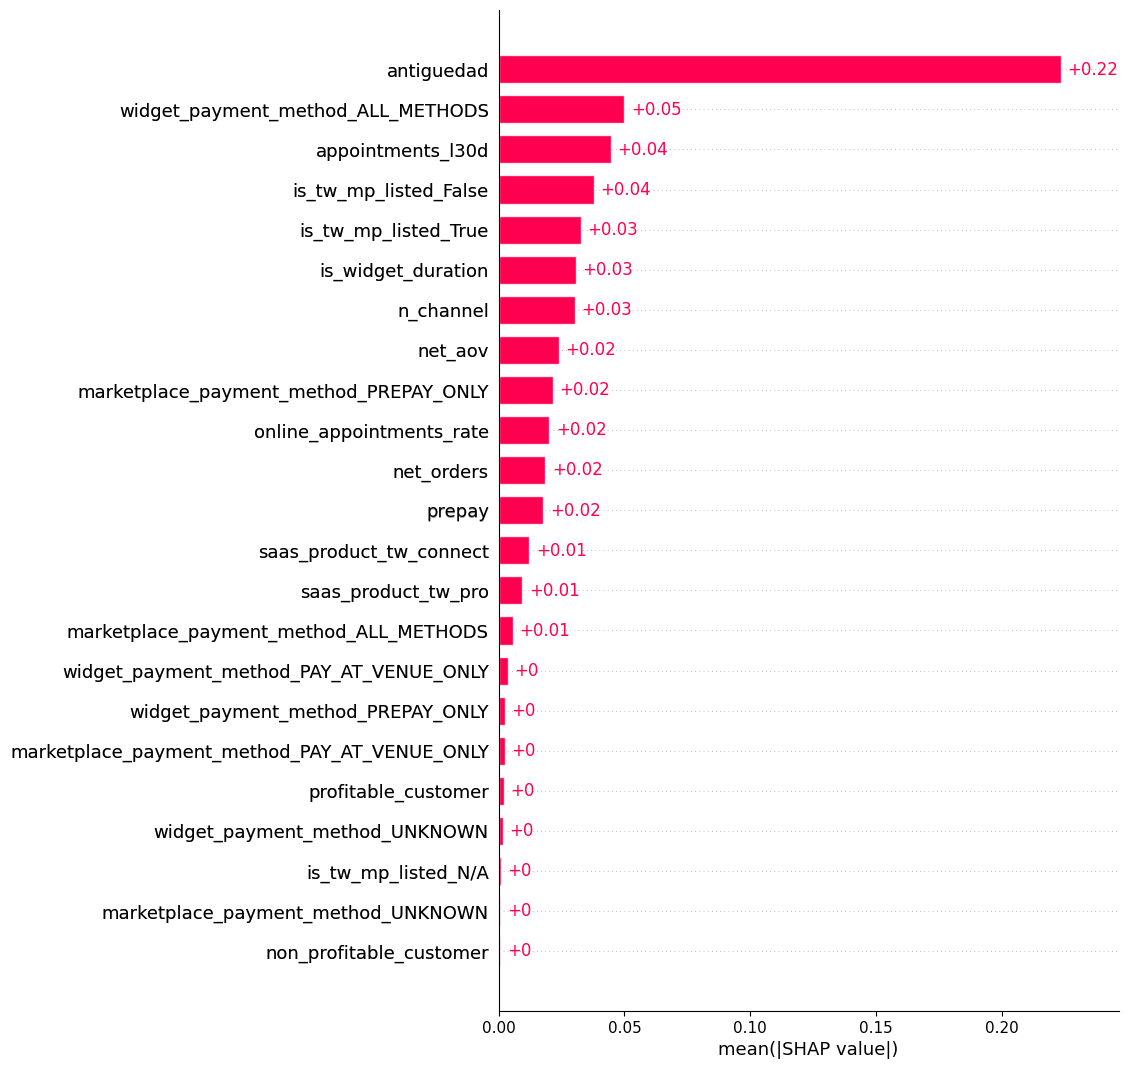

In [ ]:
shap.plots.bar(shap_values, max_display=None)

### Conclusiones
Podemos ver que la variable que más contribuye al aumento de la predicción del modelo es **antiguedad (0.22)**. Además, también podemos ver que otras variables destacadas para el modelo son: **widget_payment_method, appointments_l30d, is_tw_mp_listed, is_widget_duration, n_channel, net_aov, marketplace_payment_method, online_appointments_rate, net_orders, prepay, saas_product**.

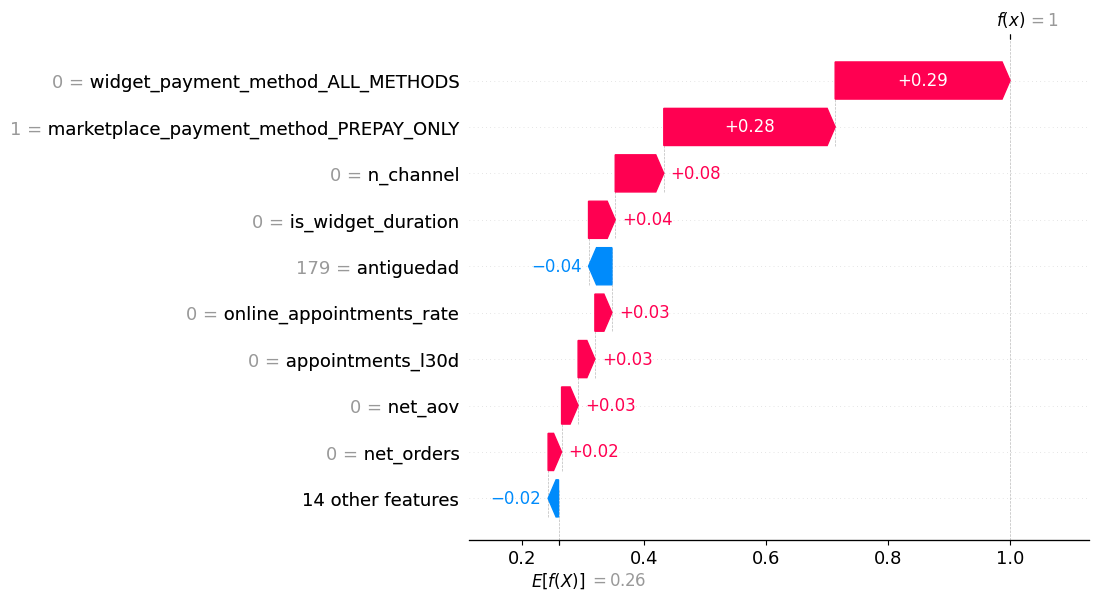

In [ ]:
# Visualizar la contribución de cada variable en la predicción
shap.plots.waterfall(shap_values[0])

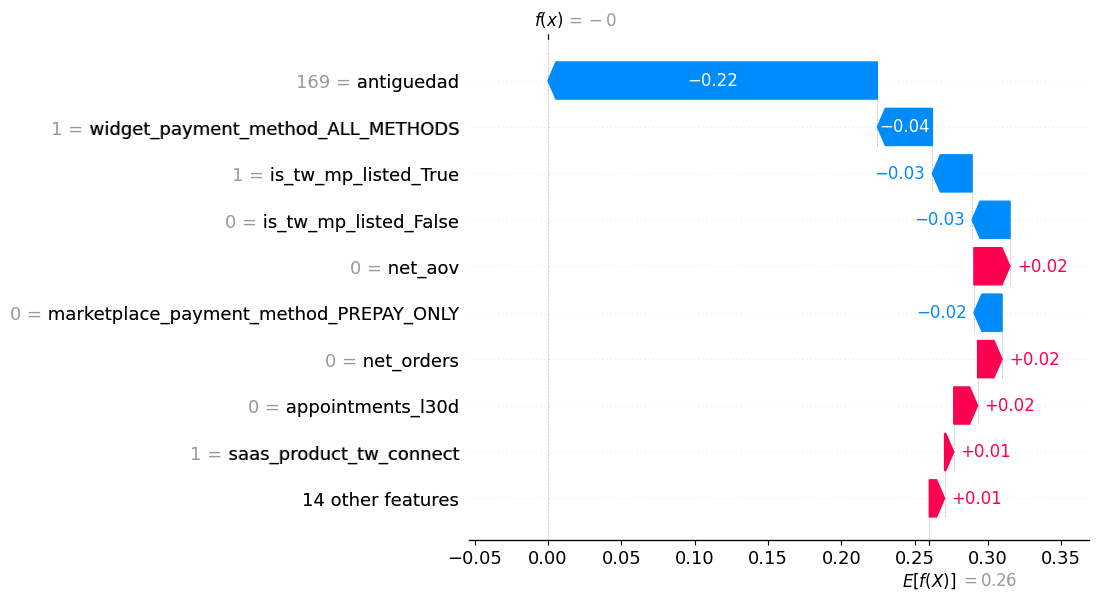

In [9]:
# Visualizar la contribución de cada variable en la predicción
shap.plots.waterfall(shap_values[2130])

### Para analizar el efecto que tiene cada variable se grafica el Summary Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


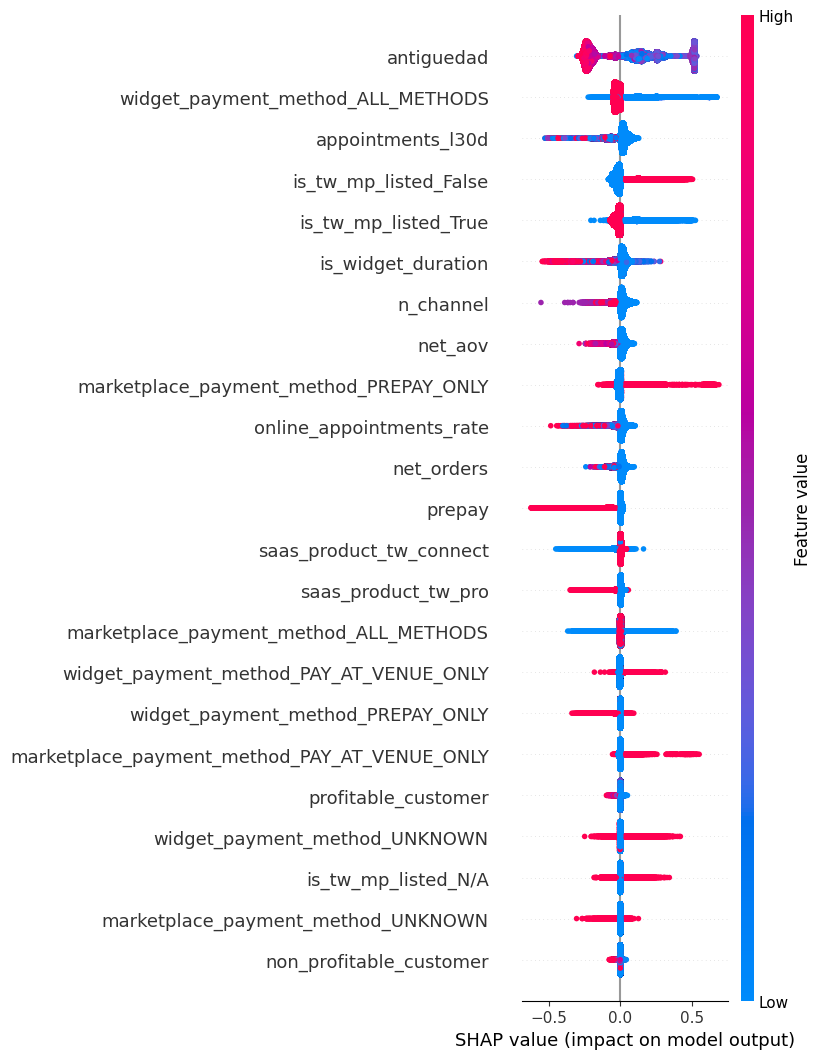

In [ ]:
shap.summary_plot(shap_values, max_display=X_test.shape[1])

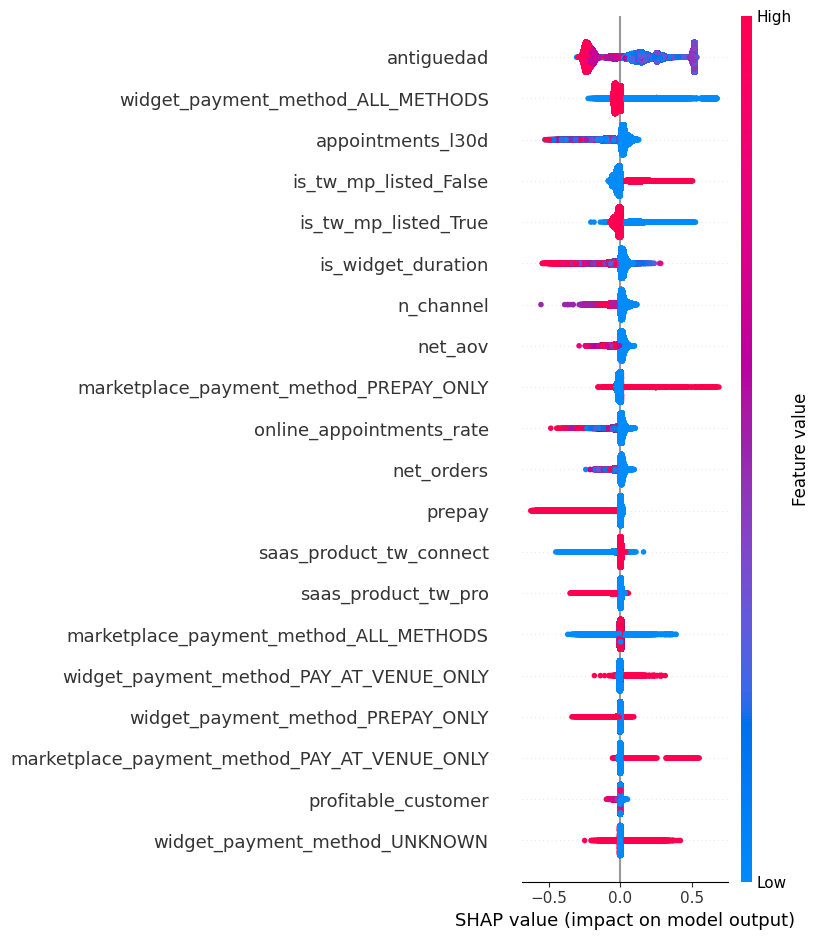

In [ ]:
shap.summary_plot(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


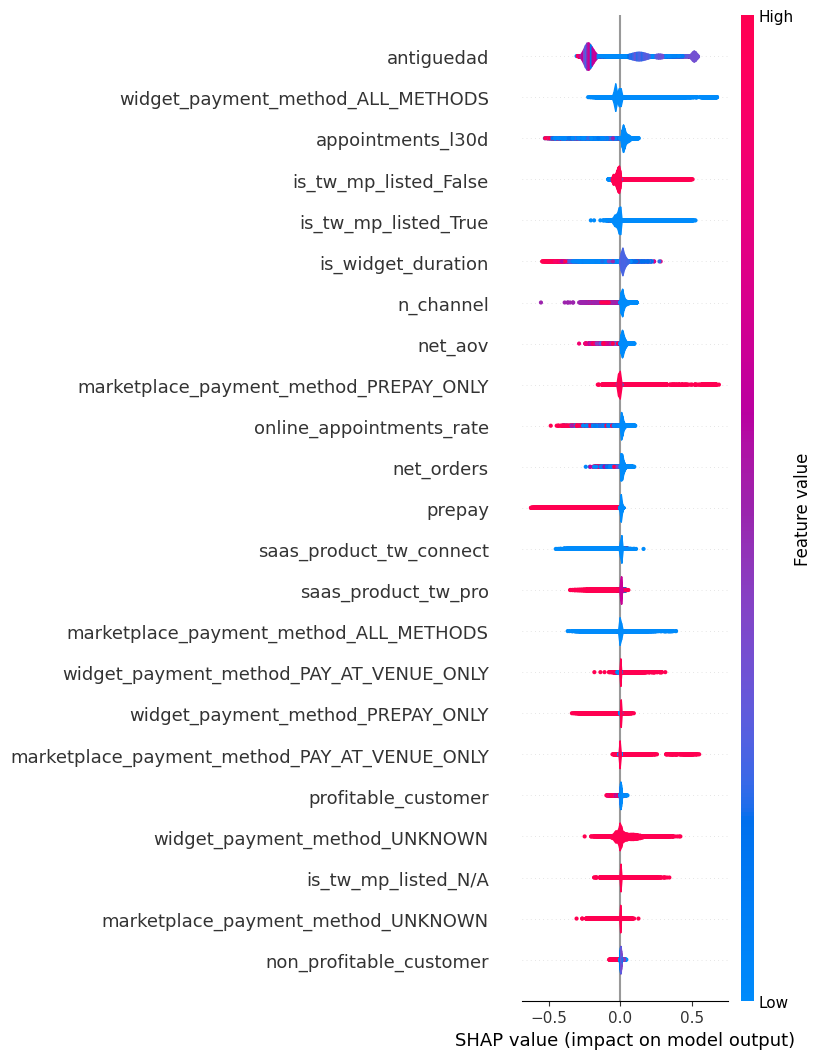

In [ ]:
#estilo violin
shap.summary_plot(shap_values, plot_type='violin' ,max_display=X_test.shape[1])

### Conclusiones
- A menor antiguedad de la venue, mayor probabilidad de churn.
- Si tiene la opcion prepay, se observa una disminucion en la probabilidad de churn.
- Tener una alta cantidad de appointments_l30d, n_channel y net_aov muestra una menor probabilidad de churn.
- No estar presente en is_tw_mp_listed muestra una mayor probabilidad de churn.